# Goal
The goal of this project is to investigate the impact of the February 2021 Residential Tenancies Amendment Bill by observing changing rental trends on the New Zealand housing market.

# Data Source
The data was sourced from the NZ Tenancy Services [website](https://www.tenancy.govt.nz/about-tenancy-services/data-and-statistics/rental-bond-data). Three CSV files were provided with territorial, regional, and quarterly aggregate bond statistics. In order to translate Location Id's from the quarterly dataset into location names, it was also necessary to retrieve data from the Stats NZ [site](https://datafinder.stats.govt.nz/layer/98770-statistical-area-2-2019-centroid-true/).

# Data Processing
One of the first data processing tasks was to ensure each data column was imported as the correct type, according to its data values. I noticed that some of the ".Bond" and ".Rent" columns of each dataset were importing as character-type columns, which did not match their numeric contents. Processing those columns involved removing the thousands-delimiting commas and converting to integer type.

The next data processing step was to convert the `Time Frame` column into more appropriate `year` and `quarter` or `month` columns. The lubridate library made that a simple task.

I also joined the Stats NZ location ID and location name columns with the quarterly report, so that location names could be easily included in future analysis. It was necessary to manually add ID `-99` to get the location name `"ALL"` to join correctly.

In [16]:
quarterly <- read.csv("Detailed Quarterly Tenancy.csv")
sapply(quarterly, class)

Time.Frame             Location.Id           Dwelling.Type 
            "character"             "character"             "character" 
         Number.Of.Beds             Total.Bonds            Active.Bonds 
            "character"             "character"             "character" 
           Closed.Bonds             Median.Rent     Geometric.Mean.Rent 
            "character"             "character"             "character" 
    Upper.Quartile.Rent     Lower.Quartile.Rent Log.Std.Dev.Weekly.Rent 
            "character"               "integer"               "numeric"

In [2]:
library(tidyverse)

q2 <- quarterly %>%
    mutate(across(str_subset(names(quarterly), 
                             regex(".Bond|(n|e).Rent|.Id")), 
                  function(x) {as.integer(gsub(',', '', x))}))
head(q2)

── Attaching packages ─────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Time.Frame,Location.Id,Dwelling.Type,Number.Of.Beds,Total.Bonds,Active.Bonds,Closed.Bonds,Median.Rent,Geometric.Mean.Rent,Upper.Quartile.Rent,Lower.Quartile.Rent,Log.Std.Dev.Weekly.Rent
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Apr 1 1993 12:00AM,-99,ALL,1,2910,12456,2694,110,109,130,90,0.34
2,Apr 1 1993 12:00AM,-99,ALL,2,8370,37881,7113,140,140,165,120,0.29
3,Apr 1 1993 12:00AM,-99,ALL,3,8406,38136,6876,170,168,200,140,0.35
4,Apr 1 1993 12:00AM,-99,ALL,4,1563,7875,1251,200,200,260,160,0.43
5,Apr 1 1993 12:00AM,-99,ALL,5+,315,2103,255,240,217,300,160,0.62
6,Apr 1 1993 12:00AM,-99,ALL,ALL,22002,100128,18495,150,150,185,120,0.38


In [3]:
library(lubridate)
q3 <- q2 %>%
    mutate(date = mdy_hm(Time.Frame)) %>%
    mutate(year = year(date)) %>%
    mutate(quarter = quarter(date)) %>%
    mutate(date = paste(year, quarter, sep='-'))# %>%
    #select(-Time.Frame)
head(q3)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




,Time.Frame,Location.Id,Dwelling.Type,Number.Of.Beds,Total.Bonds,Active.Bonds,Closed.Bonds,Median.Rent,Geometric.Mean.Rent,Upper.Quartile.Rent,Lower.Quartile.Rent,Log.Std.Dev.Weekly.Rent,date,year,quarter
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<int>
1,Apr 1 1993 12:00AM,-99,ALL,1,2910,12456,2694,110,109,130,90,0.34,1993-2,1993,2
2,Apr 1 1993 12:00AM,-99,ALL,2,8370,37881,7113,140,140,165,120,0.29,1993-2,1993,2
3,Apr 1 1993 12:00AM,-99,ALL,3,8406,38136,6876,170,168,200,140,0.35,1993-2,1993,2
4,Apr 1 1993 12:00AM,-99,ALL,4,1563,7875,1251,200,200,260,160,0.43,1993-2,1993,2
5,Apr 1 1993 12:00AM,-99,ALL,5+,315,2103,255,240,217,300,160,0.62,1993-2,1993,2
6,Apr 1 1993 12:00AM,-99,ALL,ALL,22002,100128,18495,150,150,185,120,0.38,1993-2,1993,2


In [4]:
regional <- read.csv("rentalbond-data-regional.csv")
r2 <- regional %>%
    mutate(across(c(Lodged.Bonds, Closed.Bonds),
                  function(x) {as.integer(gsub(',', '', x))}))
r3 <- r2 %>%
    mutate(date = ymd(Time.Frame)) %>%
    mutate(year = year(date)) %>%
    mutate(month = month(date)) %>%
    select(-Time.Frame)
head(r3)

,Location.Id,Location,Lodged.Bonds,Active.Bonds,Closed.Bonds,Median.Rent,Geometric.Mean.Rent,Upper.Quartile.Rent,Lower.Quartile.Rent,Log.Std.Dev.Weekly.Rent,date,year,month
,<dbl>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>
1,-99,ALL,9147,95583,7155,150,151,200,120,0.43,1993-02-01,1993,2
2,-1,NA,525,6264,432,130,127,165,100,0.47,1993-02-01,1993,2
3,1,Northland Region,174,1824,141,120,118,145,100,0.30,1993-02-01,1993,2
4,2,Auckland Region,2343,30315,1962,180,186,220,150,0.36,1993-02-01,1993,2
5,3,Waikato Region,888,8475,690,120,124,158,100,0.34,1993-02-01,1993,2
6,4,Bay of Plenty Region,429,4869,366,140,134,160,120,0.29,1993-02-01,1993,2


In [5]:
tla <- read.csv("rentalbond-data-tla.csv")

t2 <- tla %>%
    mutate(across(c(Lodged.Bonds, Active.Bonds),
                  function(x) {as.integer(gsub(',', '', x))}))
t3 <- t2 %>%
    mutate(date = ymd(Time.Frame)) %>%
    mutate(year = year(date)) %>%
    mutate(month = month(date)) %>%
    select(-c(Time.Frame, date))
head(t3)

,Location.Id,Location,Lodged.Bonds,Active.Bonds,Closed.Bonds,Median.Rent,Geometric.Mean.Rent,Upper.Quartile.Rent,Lower.Quartile.Rent,Log.Std.Dev.Weekly.Rent,year,month
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,-99,ALL,9147,95583,7155,150,151,200,120,0.43,1993,2
2,-1,NA,525,6264,432,130,127,165,100,0.47,1993,2
3,1,Far North District,45,465,24,120,112,136,95,0.30,1993,2
4,2,Whangarei District,120,1248,108,120,121,150,100,0.30,1993,2
5,3,Kaipara District,12,108,12,118,113,121,98,0.31,1993,2
6,11,Thames-Coromandel District,39,324,21,120,121,146,100,0.29,1993,2


In [6]:
areas <- read.csv("statsnzstatistical-area-2-2019-centroid-true-CSV/statistical-area-2-2019-centroid-true.csv")
locations <- areas %>%
    mutate(ID = SA22019_V1_00) %>%
    mutate(Location = SA22019_V1_00_NAME) %>%
    select(c(ID, Location))
locations <- rbind(locations, list(-99, 'ALL'))
tail(locations)

,ID,Location
,<dbl>,<chr>
2235,363500,Oceanic Nelson Region
2236,363600,Oceanic Marlborough Region
2237,363700,Oceanic Southland Region
2238,363800,Oceanic Canterbury Region
2239,363900,Oceanic Otago Region
2240,-99,ALL


In [7]:
q.df <- left_join(q3, locations, by=c('Location.Id' = 'ID'))
head(q.df)
r.df <- r3
t.df <- t3

,Time.Frame,Location.Id,Dwelling.Type,Number.Of.Beds,Total.Bonds,Active.Bonds,Closed.Bonds,Median.Rent,Geometric.Mean.Rent,Upper.Quartile.Rent,Lower.Quartile.Rent,Log.Std.Dev.Weekly.Rent,date,year,quarter,Location
,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<int>,<chr>
1,Apr 1 1993 12:00AM,-99,ALL,1,2910,12456,2694,110,109,130,90,0.34,1993-2,1993,2,ALL
2,Apr 1 1993 12:00AM,-99,ALL,2,8370,37881,7113,140,140,165,120,0.29,1993-2,1993,2,ALL
3,Apr 1 1993 12:00AM,-99,ALL,3,8406,38136,6876,170,168,200,140,0.35,1993-2,1993,2,ALL
4,Apr 1 1993 12:00AM,-99,ALL,4,1563,7875,1251,200,200,260,160,0.43,1993-2,1993,2,ALL
5,Apr 1 1993 12:00AM,-99,ALL,5+,315,2103,255,240,217,300,160,0.62,1993-2,1993,2,ALL
6,Apr 1 1993 12:00AM,-99,ALL,ALL,22002,100128,18495,150,150,185,120,0.38,1993-2,1993,2,ALL


# Data Exploration
demonstrate how you use your processed data to explore each one of the three data exploration directions you specified in Project Milestone 1. Produce and summarise the outputs such as summary statistics, graphics and comments in a cohesive manner.   	3 * 5

## M2
### Aggregate bond numbers before and after Bill

Loading required package: viridisLite



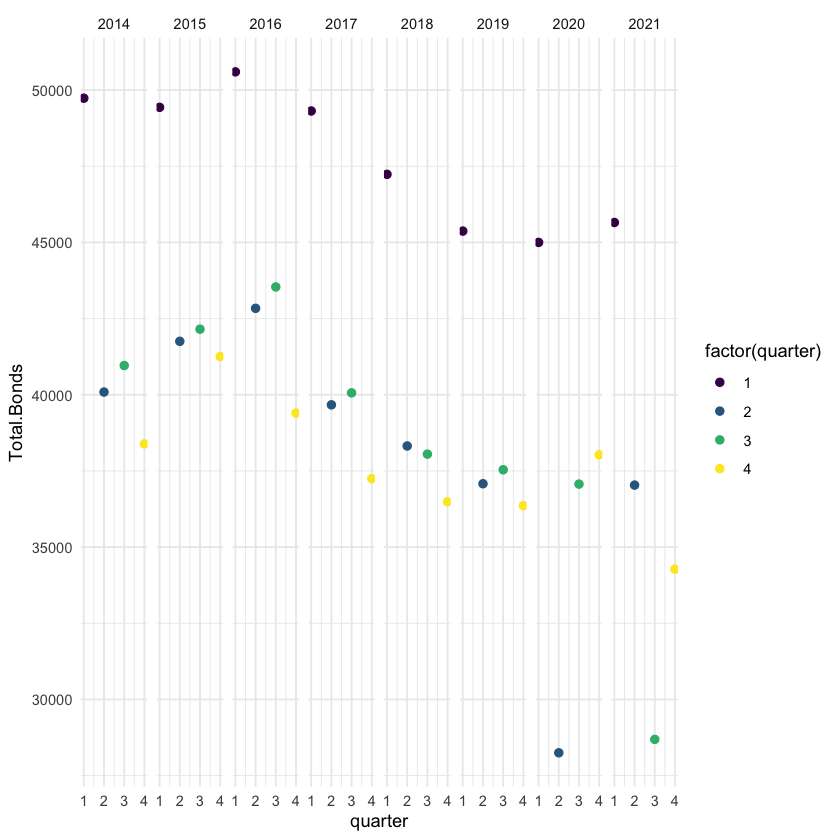

In [8]:
library(ggplot2)
library(viridis)

q.df %>%
    filter(Location == 'ALL', Dwelling.Type == 'ALL', Number.Of.Beds == 'ALL', year > 2013) %>%
    ggplot(aes(x=quarter, y=Total.Bonds, colour=factor(quarter))) +
    facet_grid(~year) +
    geom_point(size=2) + 
    scale_color_viridis(discrete=T) +
    theme_minimal()

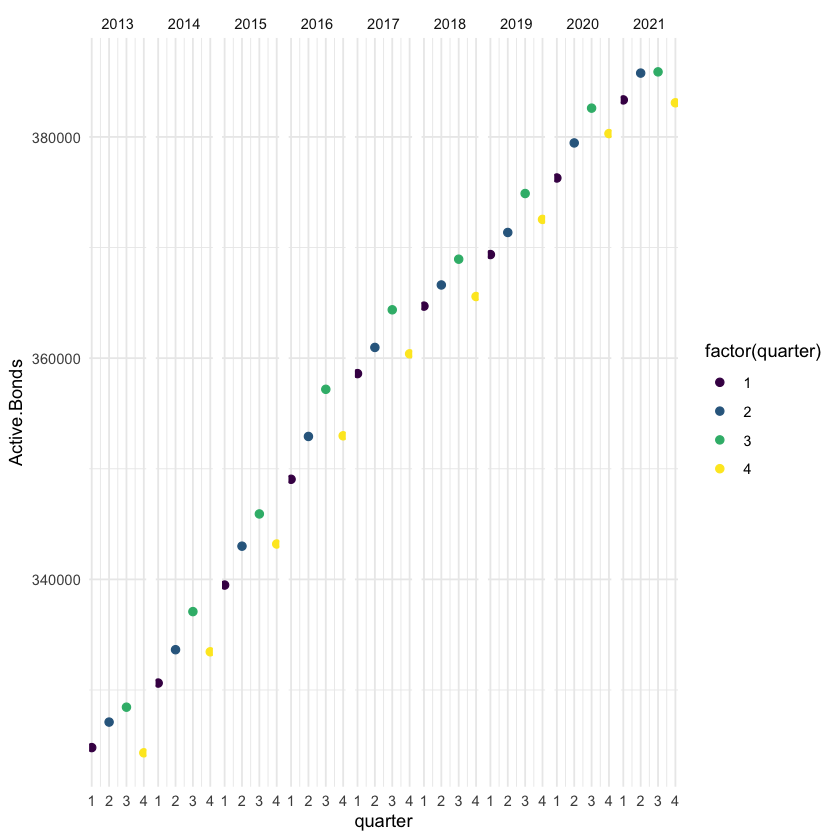

In [9]:
q.df %>%
    filter(Location == 'ALL', Dwelling.Type == 'ALL', Number.Of.Beds == 'ALL', year > 2012) %>%
    ggplot(aes(x=quarter, y=Active.Bonds, colour=factor(quarter))) +
    facet_grid(~year) +
    geom_point(size=2) + 
    scale_color_viridis(discrete=T) +
    theme_minimal()

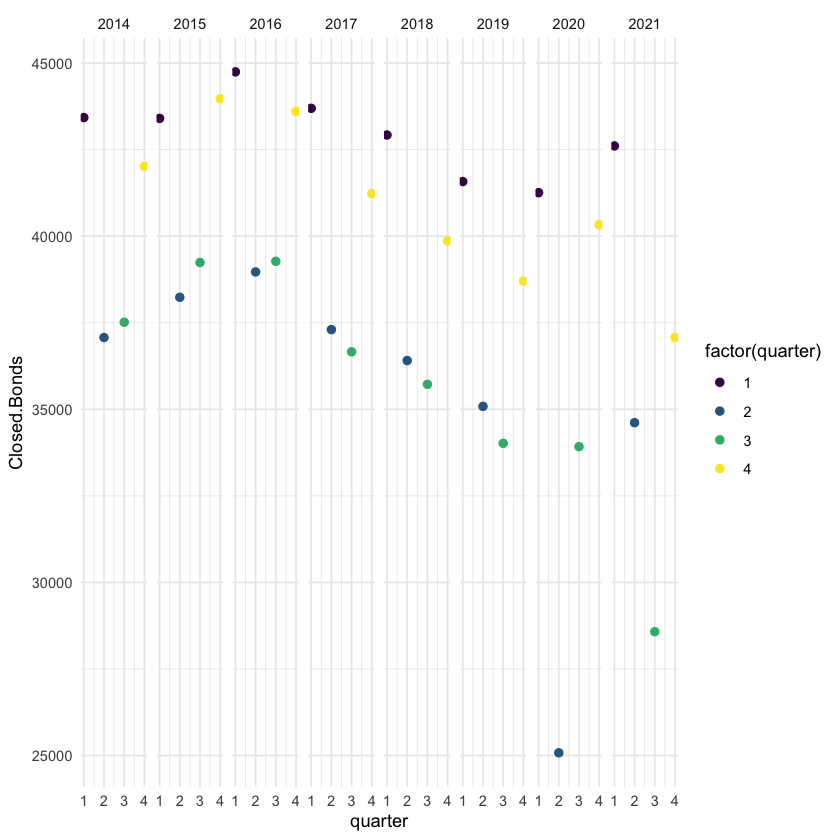

In [10]:
q.df %>%
    filter(Location == 'ALL', Dwelling.Type == 'ALL', Number.Of.Beds == 'ALL', year > 2013) %>%
    ggplot(aes(x=quarter, y=Closed.Bonds, colour=factor(quarter))) +
    facet_grid(~year) +
    geom_point(size=2) + 
    scale_color_viridis(discrete=T) +
    theme_minimal()

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


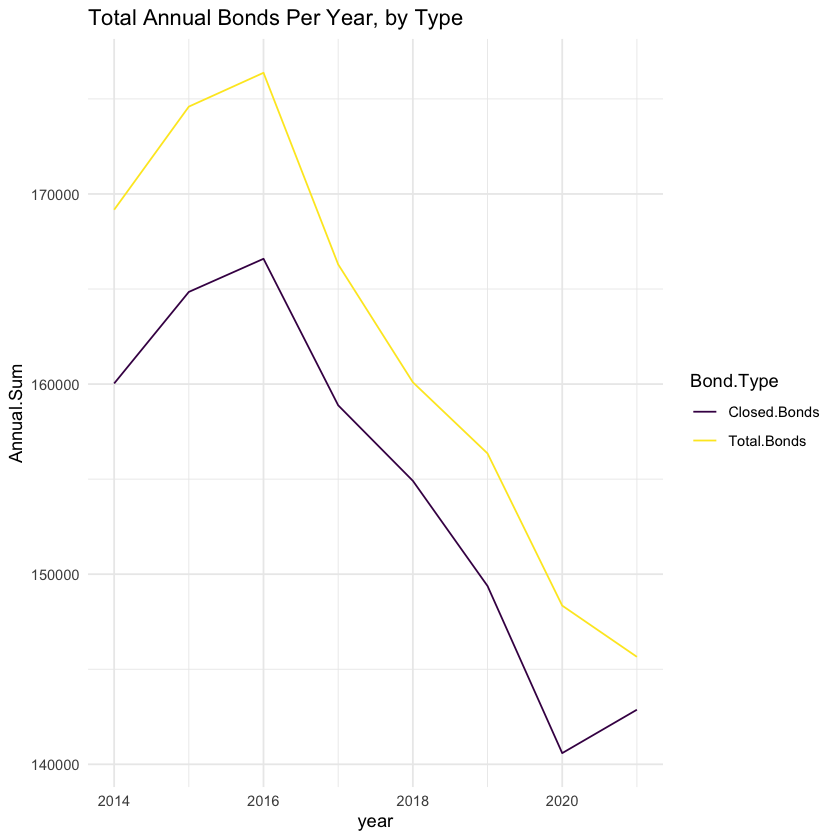

In [11]:
q.type = q.df %>%
    filter(Location == 'ALL', Dwelling.Type == 'ALL', 
           Number.Of.Beds == 'ALL', year > 2013) %>%
    pivot_longer(c(Total.Bonds, Closed.Bonds), 
                 names_to="Bond.Type", values_to="Bond.Number") %>%
    group_by(year, Bond.Type) %>%
    summarise(Annual.Sum = sum(Bond.Number))

q.type %>%
    ggplot(aes(x=year, y=Annual.Sum, colour=Bond.Type)) +
    geom_line() +
    scale_colour_viridis(discrete=T) +
    theme_minimal() +
    labs(title="Total Annual Bonds Per Year, by Type")

### Disaggregated - were any locations more/less affected

`summarise()` has grouped output by 'year', 'Bond.Type'. You can override using the `.groups`
argument.


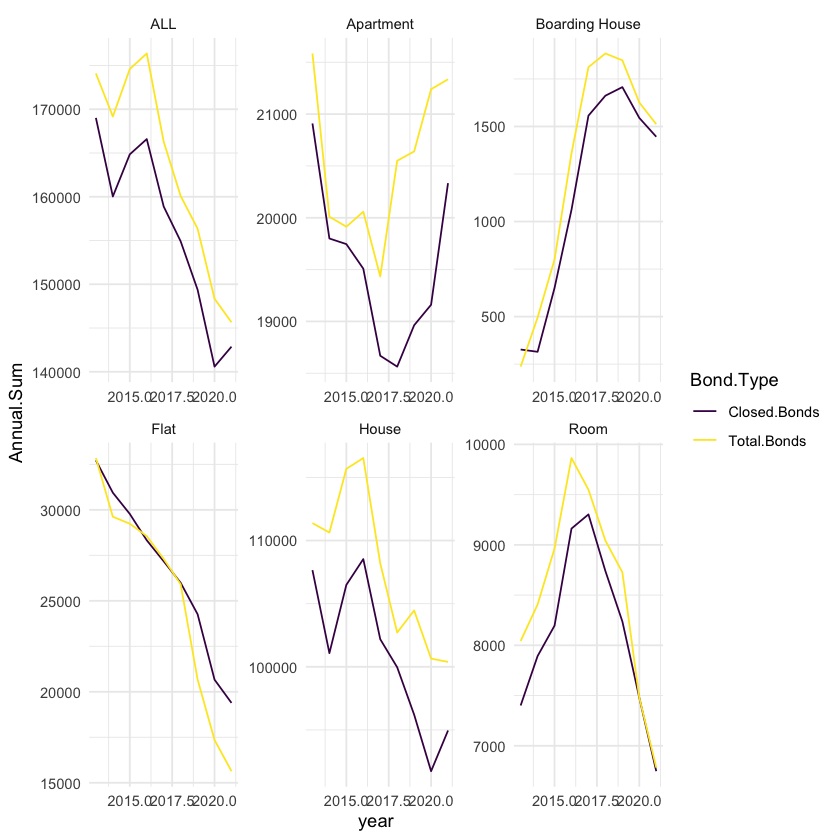

In [12]:
q.building = q.df %>%
    filter(Location == 'ALL', Number.Of.Beds == 'ALL', year > 2012) %>%
    pivot_longer(c(Total.Bonds, Closed.Bonds), 
                 names_to="Bond.Type", values_to="Bond.Number") %>%
    group_by(year, Bond.Type, Dwelling.Type) %>%
    summarise(Annual.Sum = sum(Bond.Number))

q.building %>%
    ggplot(aes(x=year, y=Annual.Sum, colour=Bond.Type)) +
    facet_wrap(~Dwelling.Type, scales="free") +
    geom_line() +
    scale_colour_viridis(discrete=T) +
    theme_minimal()

`summarise()` has grouped output by 'year', 'Bond.Type'. You can override using the `.groups`
argument.


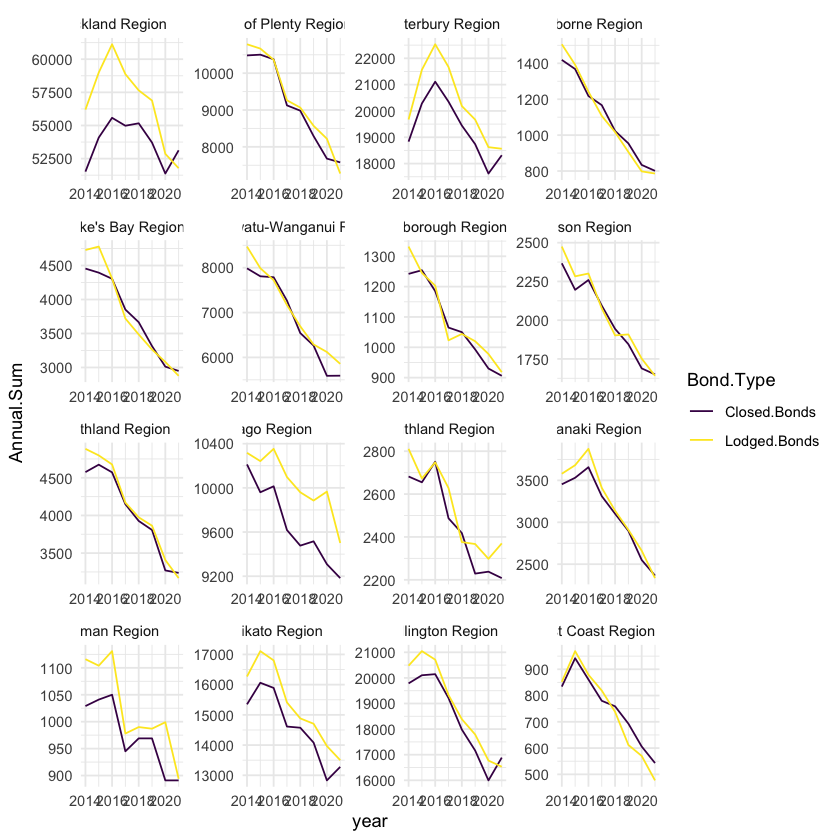

In [13]:
r.loc = r.df %>%
    filter(Location.Id > 0, year > 2013, year < 2022) %>%
    pivot_longer(c(Lodged.Bonds, Closed.Bonds), 
                 names_to="Bond.Type", values_to="Bond.Number") %>%
    group_by(year, Bond.Type, Location) %>%
    summarise(Annual.Sum = sum(Bond.Number))


r.loc %>%
    ggplot(aes(x=year, y=Annual.Sum, colour=Bond.Type)) +
    facet_wrap(~Location, scales="free") +
    geom_line() +
    scale_colour_viridis(discrete=T) +
    theme_minimal()

### Weekly rents before and after

`summarise()` has grouped output by 'year', 'Type'. You can override using the `.groups` argument.


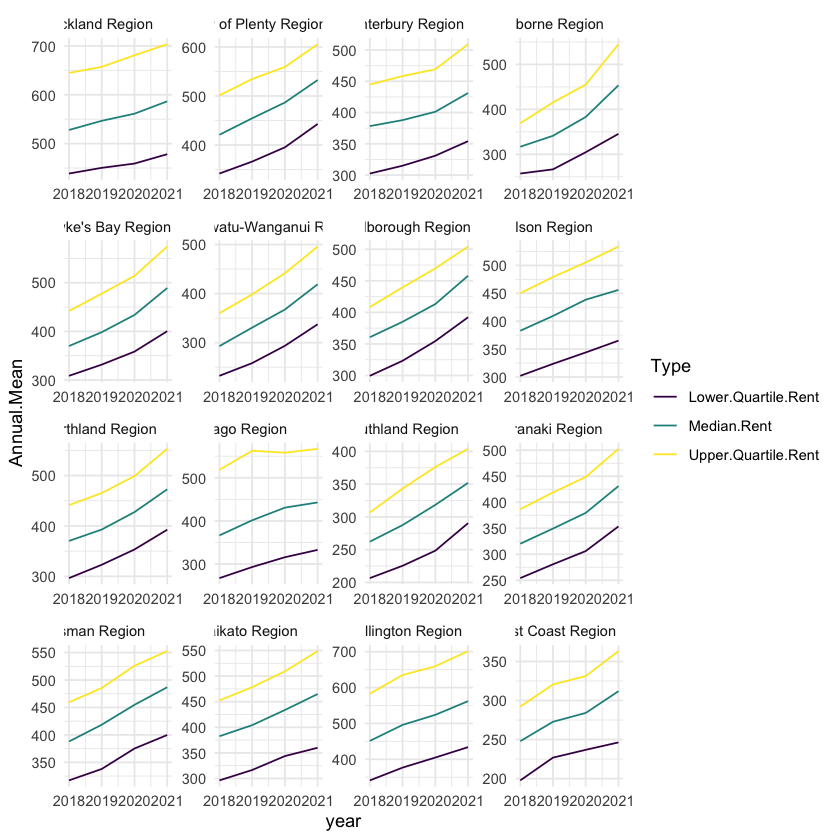

In [14]:
r.time = r.df %>%
    filter(Location.Id > 0, year > 2017, year < 2022) %>%
    pivot_longer(c(Median.Rent, Upper.Quartile.Rent, Lower.Quartile.Rent), 
                 names_to="Type", values_to="Value") %>%
    group_by(year, Type, Location) %>%
    summarise(Annual.Mean = mean(Value))

r.time %>%
    ggplot(aes(x=year, y=Annual.Mean, colour=Type)) +
    facet_wrap(~Location, scales="free") +
    geom_line() +
    scale_colour_viridis(discrete=T) +
    theme_minimal()

# Analytical Plan
Based on the information illuminated in the data exploration, it is possible that the effects of the Bill have varied across different dwelling types. One potential analytical path forward is constructing a paired t-test to see if there is a statistically significant difference between the time periods before and after the Bill. Perhaps a better way to test that hypothesis is to infer causality with a Bayesian structural time-series model. By building a Bayesian model from data before the Bill's implementation, we can attempt to predict the data after the Bill and compare those predictions with the actual data to infer the Bill's effect.

# Appendix
include here the detailed information or code script  that is too large to be incorporate into the main body text. This is not a place for 'information dump' -- the material should be streamlined and stay relevant to the rest of the document.	3